# Análise TF-IDF - Engenheiros do Hawaii

## Objetivo
Este notebook utiliza a técnica TF-IDF (Term Frequency-Inverse Document Frequency) para identificar:
- Palavras mais importantes e características de cada álbum
- Termos que diferenciam um álbum dos outros
- Top-10 termos TF-IDF mais relevantes

## O que é TF-IDF?
TF-IDF é uma métrica que combina:
- **TF (Term Frequency)**: Frequência do termo no documento
- **IDF (Inverse Document Frequency)**: Raridade do termo no corpus completo

Resultado: Palavras frequentes EM UM documento mas raras NO CORPUS têm alto score TF-IDF.

## Metodologia
1. Carregar letras agrupadas por álbum (cada álbum = 1 documento)
2. Aplicar TF-IDF usando sklearn
3. Identificar termos mais característicos de cada álbum
4. Visualizar resultados

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizações
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# Carregar stopwords em português do repositório stopwords-iso
import json

# Carregar stopwords do arquivo JSON
with open('stopwords-repo/stopwords-pt.json', 'r', encoding='utf-8') as f:
    stopwords_pt = json.load(f)  # Manter como lista para TfidfVectorizer

# Adicionar stopwords customizadas específicas para limpeza de letras
# Nota: 'aqui' já está no repositório, mas 'pra' não está
# 'aquie' é um erro comum de digitação (aqui e)
stopwords_customizadas = ['p', 'br', 'vez', 'pra', 'pro', 'aquie']
stopwords_pt.extend(stopwords_customizadas)

print(f"Total de stopwords carregadas: {len(stopwords_pt)}")
print(f"Stopwords customizadas adicionadas: {stopwords_customizadas}")
print(f"Fonte: https://github.com/stopwords-iso/stopwords-pt")

Total de stopwords carregadas: 566
Stopwords customizadas adicionadas: ['p', 'br', 'vez', 'pra', 'pro', 'aquie']
Fonte: https://github.com/stopwords-iso/stopwords-pt


In [3]:
def limpar_html(texto):
    """Remove tags HTML do texto"""
    if pd.isna(texto):
        return ""
    soup = BeautifulSoup(str(texto), 'html.parser')
    return soup.get_text()

def processar_texto(texto):
    """Processa o texto: lowercase, remove pontuação"""
    texto = limpar_html(texto)
    texto = texto.lower()
    texto = re.sub(r'[^a-záàâãéèêíïóôõöúçñ\s]', ' ', texto)
    texto = re.sub(r'\s+', ' ', texto)
    return texto.strip()

In [4]:
# Carregar todos os arquivos CSV agrupados por álbum
arquivos_csv = glob.glob('letras_engenheiros_hawaii/*.csv')
print(f"Total de álbuns encontrados: {len(arquivos_csv)}\n")

# Dicionário para armazenar letras por álbum
albuns = {}

for arquivo in arquivos_csv:
    try:
        df = pd.read_csv(arquivo, encoding='utf-8')
        album_nome = arquivo.split('\\')[-1].replace('.csv', '')
        
        # Concatenar todas as letras do álbum
        letras_album = []
        for _, row in df.iterrows():
            if 'Letra' in row:
                letras_album.append(processar_texto(row['Letra']))
        
        albuns[album_nome] = " ".join(letras_album)
        print(f"✓ {album_nome}: {len(letras_album)} músicas")
    except Exception as e:
        print(f"✗ Erro ao ler {arquivo}: {e}")

print(f"\nTotal de álbuns carregados: {len(albuns)}")

Total de álbuns encontrados: 27

✓ !Tchau_Radar!: 12 músicas
✓ 10.000_Destinos_(Ao_Vivo): 19 músicas
✓ 100_Anos_de_Música: 28 músicas
✓ Acervo_Especial_-_Engenheiros_do_Hawaii: 14 músicas
✓ Acústico_(Ao_Vivo__Deluxe): 20 músicas
✓ Alívio_Imediato: 12 músicas
✓ A_Revolta_dos_Dândis: 11 músicas
✓ Dançando_No_Campo_Minado: 11 músicas
✓ Filmes_de_Guerra,_Canções_de_Amor: 12 músicas
✓ Focus: 20 músicas
✓ Gessinger,_Licks_&_Maltz: 12 músicas
✓ Gold: 14 músicas
✓ Infinita_Highway: 118 músicas
✓ Longe_Demais_Das_Capitais: 12 músicas
✓ Maxximum: 20 músicas
✓ Mega_Hits: 15 músicas
✓ Minuano: 12 músicas
✓ Novos_Horizontes_(Acústico)_(Ao_Vivo)_: 18 músicas
✓ Novo_Millenium: 20 músicas
✓ Ouça_o_Que_Eu_Digo_Não_Ouça_Ninguem: 11 músicas
✓ O_Melhor_de_Engenheiros_do_Hawaii: 14 músicas
✓ O_Papa_É_Pop: 11 músicas
✓ Seleção_Essencial_-_Grandes_Sucessos: 17 músicas
✓ Sem_Limite: 30 músicas
✓ Simples_de_Coração: 11 músicas
✓ Surfando_Karmas_&_DNA: 11 músicas
✓ Várias_Variáveis: 14 músicas

Total de álbuns 

In [5]:
# Criar corpus (lista de documentos)
nomes_albuns = list(albuns.keys())
corpus = list(albuns.values())

# Aplicar TF-IDF
vectorizer = TfidfVectorizer(
    max_features=500,  # Top 500 termos
    min_df=2,          # Palavra deve aparecer em pelo menos 2 documentos
    max_df=0.8,        # Palavra não pode aparecer em mais de 80% dos documentos
    stop_words=stopwords_pt,
    ngram_range=(1, 1)  # Apenas unigramas
)

tfidf_matrix = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()

print(f"Matriz TF-IDF criada: {tfidf_matrix.shape}")
print(f"Dimensões: {len(nomes_albuns)} álbuns × {len(feature_names)} termos")

Matriz TF-IDF criada: (27, 500)
Dimensões: 27 álbuns × 500 termos


In [6]:
# Converter para DataFrame para facilitar análise
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    index=nomes_albuns,
    columns=feature_names
)

print("Preview da matriz TF-IDF:")
print(tfidf_df.iloc[:5, :10])

Preview da matriz TF-IDF:
                                           aberta     abrem    abrigo  \
!Tchau_Radar!                            0.236832  0.000000  0.026883   
10.000_Destinos_(Ao_Vivo)                0.000000  0.023986  0.000000   
100_Anos_de_Música                       0.000000  0.000000  0.016639   
Acervo_Especial_-_Engenheiros_do_Hawaii  0.000000  0.025266  0.022430   
Acústico_(Ao_Vivo__Deluxe)               0.105938  0.027091  0.000000   

                                            acaba     acaso     achar  \
!Tchau_Radar!                            0.000000  0.000000  0.000000   
10.000_Destinos_(Ao_Vivo)                0.063880  0.000000  0.010647   
100_Anos_de_Música                       0.024959  0.000000  0.008320   
Acervo_Especial_-_Engenheiros_do_Hawaii  0.000000  0.000000  0.011215   
Acústico_(Ao_Vivo__Deluxe)               0.024050  0.019902  0.012025   

                                         acharnum      acho  acontece  \
!Tchau_Radar!          

In [7]:
# Top 10 termos TF-IDF globais (média entre todos os álbuns)
tfidf_medias = tfidf_df.mean(axis=0).sort_values(ascending=False)
top_10_global = tfidf_medias.head(10)

print("="*60)
print("TOP 10 TERMOS TF-IDF GLOBAIS")
print("="*60)
for i, (termo, score) in enumerate(top_10_global.items(), 1):
    print(f"{i:2d}. {termo:20s} - Score: {score:.4f}")
print("="*60)

TOP 10 TERMOS TF-IDF GLOBAIS
 1. pop                  - Score: 0.1935
 2. highway              - Score: 0.1332
 3. papa                 - Score: 0.1030
 4. poupa                - Score: 0.0848
 5. rá                   - Score: 0.0817
 6. tatá                 - Score: 0.0817
 7. tátatá               - Score: 0.0762
 8. ouça                 - Score: 0.0714
 9. yeah                 - Score: 0.0708
10. digo                 - Score: 0.0629


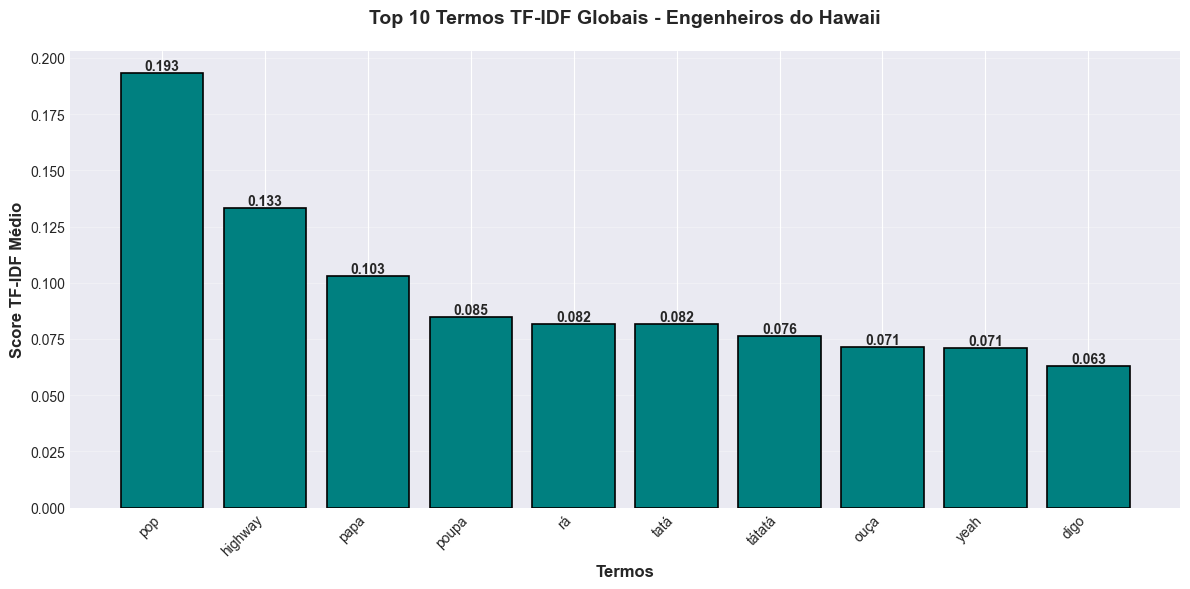


Gráfico salvo como: top10_tfidf_global.png


In [8]:
# Visualização: Top 10 termos TF-IDF globais
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_10_global)), top_10_global.values, 
               color='teal', edgecolor='black', linewidth=1.2)

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(range(len(top_10_global)), top_10_global.index, rotation=45, ha='right')
plt.xlabel('Termos', fontsize=12, fontweight='bold')
plt.ylabel('Score TF-IDF Médio', fontsize=12, fontweight='bold')
plt.title('Top 10 Termos TF-IDF Globais - Engenheiros do Hawaii', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('top10_tfidf_global.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfico salvo como: top10_tfidf_global.png")

In [9]:
# Top 10 termos TF-IDF para alguns álbuns específicos
albuns_destaque = ['Minuano', 'O_Papa_É_Pop', 'Alívio_Imediato', 
                   'Longe_Demais_Das_Capitais', 'Várias_Variáveis']

# Filtrar apenas álbuns que existem
albuns_destaque = [a for a in albuns_destaque if a in tfidf_df.index]

print("\n" + "="*60)
print("TOP 10 TERMOS TF-IDF POR ÁLBUM")
print("="*60)

for album in albuns_destaque:
    top_termos = tfidf_df.loc[album].sort_values(ascending=False).head(10)
    print(f"\n{album.upper()}:")
    print("-" * 60)
    for i, (termo, score) in enumerate(top_termos.items(), 1):
        print(f"{i:2d}. {termo:20s} - Score: {score:.4f}")


TOP 10 TERMOS TF-IDF POR ÁLBUM

MINUANO:
------------------------------------------------------------
 1. haver                - Score: 0.5513
 2. montanha             - Score: 0.2768
 3. alto                 - Score: 0.2556
 4. arranha              - Score: 0.2422
 5. alguma               - Score: 0.2366
 6. medo                 - Score: 0.2116
 7. exata                - Score: 0.2076
 8. interessa            - Score: 0.1820
 9. acontece             - Score: 0.1649
10. sinto                - Score: 0.1595

O_PAPA_É_POP:
------------------------------------------------------------
 1. pop                  - Score: 0.4317
 2. exército             - Score: 0.2872
 3. travestida           - Score: 0.2535
 4. papa                 - Score: 0.2398
 5. motivo               - Score: 0.2290
 6. estragos             - Score: 0.2061
 7. modernotodo          - Score: 0.2061
 8. violência            - Score: 0.2055
 9. trottoir             - Score: 0.1878
10. trago                - Score: 0.1878



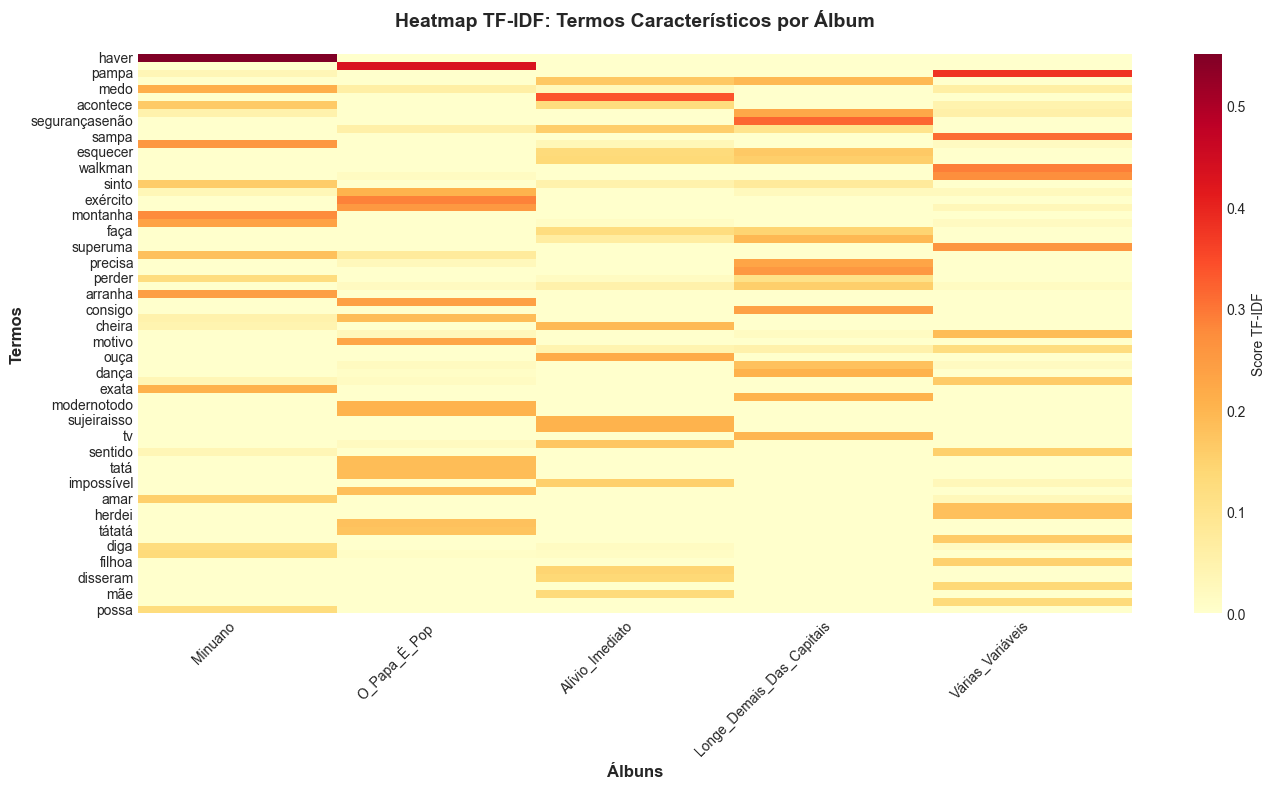


Gráfico salvo como: heatmap_tfidf_albuns.png


In [10]:
# Visualização: Heatmap dos top termos em álbuns selecionados
if len(albuns_destaque) > 0:
    # Pegar top 15 termos de cada álbum
    top_termos_por_album = set()
    for album in albuns_destaque:
        top_termos_por_album.update(tfidf_df.loc[album].sort_values(ascending=False).head(15).index)
    
    # Criar subset do dataframe
    subset_df = tfidf_df.loc[albuns_destaque, list(top_termos_por_album)]
    
    # Ordenar por score médio
    subset_df = subset_df[subset_df.mean().sort_values(ascending=False).index]
    
    plt.figure(figsize=(14, 8))
    sns.heatmap(subset_df.T, cmap='YlOrRd', annot=False, fmt='.2f', 
                cbar_kws={'label': 'Score TF-IDF'})
    plt.xlabel('Álbuns', fontsize=12, fontweight='bold')
    plt.ylabel('Termos', fontsize=12, fontweight='bold')
    plt.title('Heatmap TF-IDF: Termos Característicos por Álbum', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('heatmap_tfidf_albuns.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nGráfico salvo como: heatmap_tfidf_albuns.png")

In [11]:
# Análise: Termos mais característicos (alto TF-IDF em poucos álbuns)
# Calcular variância dos scores TF-IDF
tfidf_var = tfidf_df.var(axis=0).sort_values(ascending=False)
top_caracteristicos = tfidf_var.head(20)

print("\n" + "="*60)
print("TERMOS MAIS CARACTERÍSTICOS (maior variância entre álbuns)")
print("="*60)
print("Estes termos são muito importantes em alguns álbuns específicos:")
print("-" * 60)
for i, (termo, var) in enumerate(top_caracteristicos.items(), 1):
    # Encontrar álbum com maior score para este termo
    album_max = tfidf_df[termo].idxmax()
    score_max = tfidf_df[termo].max()
    print(f"{i:2d}. {termo:20s} - Variância: {var:.4f} - Destaque em '{album_max}' ({score_max:.3f})")
print("="*60)


TERMOS MAIS CARACTERÍSTICOS (maior variância entre álbuns)
Estes termos são muito importantes em alguns álbuns específicos:
------------------------------------------------------------
 1. pop                  - Variância: 0.0451 - Destaque em 'Acústico_(Ao_Vivo__Deluxe)' (0.480)
 2. caras                - Variância: 0.0283 - Destaque em 'Dançando_No_Campo_Minado' (0.875)
 3. highway              - Variância: 0.0188 - Destaque em 'A_Revolta_dos_Dândis' (0.463)
 4. chorarnunca          - Variância: 0.0153 - Destaque em 'Surfando_Karmas_&_DNA' (0.611)
 5. papa                 - Variância: 0.0128 - Destaque em 'Acústico_(Ao_Vivo__Deluxe)' (0.254)
 6. vale                 - Variância: 0.0121 - Destaque em 'Filmes_de_Guerra,_Canções_de_Amor' (0.520)
 7. haver                - Variância: 0.0114 - Destaque em 'Minuano' (0.551)
 8. pampa                - Variância: 0.0111 - Destaque em 'Várias_Variáveis' (0.380)
 9. exército             - Variância: 0.0108 - Destaque em 'Filmes_de_Guerra,_Can

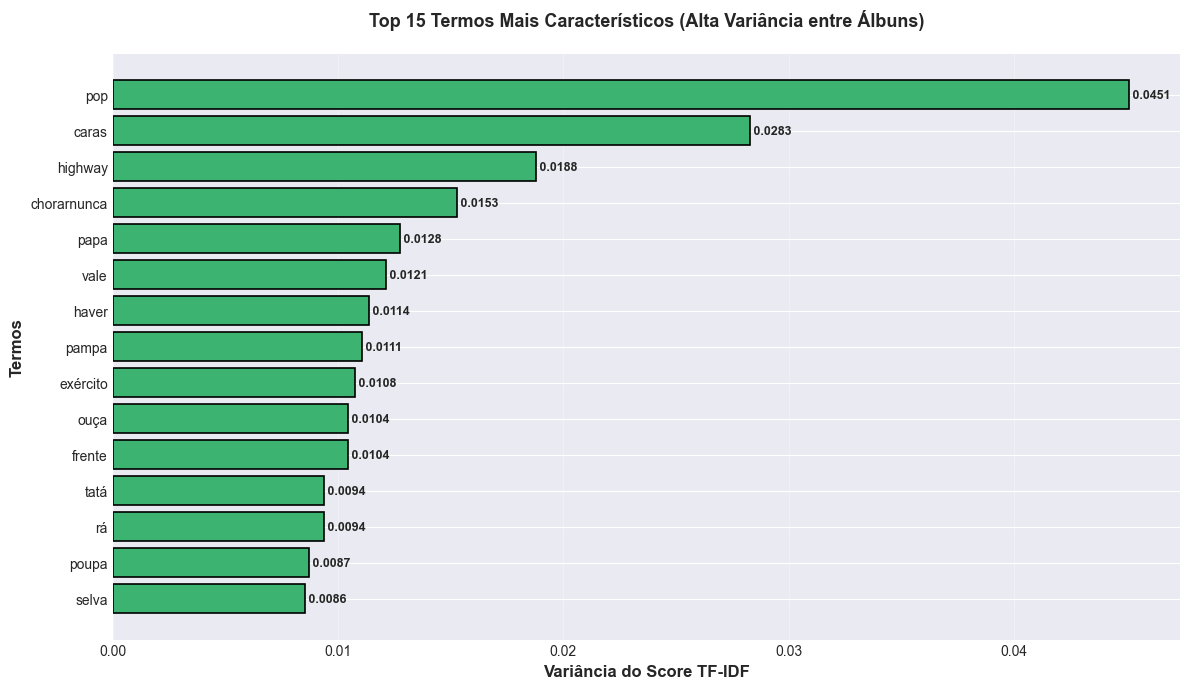


Gráfico salvo como: top15_termos_caracteristicos.png


In [12]:
# Visualização: Top 15 termos mais característicos
plt.figure(figsize=(12, 7))
top_15_car = top_caracteristicos.head(15)
bars = plt.barh(range(len(top_15_car)), top_15_car.values, 
                color='mediumseagreen', edgecolor='black', linewidth=1.2)

# Adicionar valores
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.,
             f' {width:.4f}',
             ha='left', va='center', fontsize=9, fontweight='bold')

plt.yticks(range(len(top_15_car)), top_15_car.index)
plt.xlabel('Variância do Score TF-IDF', fontsize=12, fontweight='bold')
plt.ylabel('Termos', fontsize=12, fontweight='bold')
plt.title('Top 15 Termos Mais Característicos (Alta Variância entre Álbuns)', 
          fontsize=13, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('top15_termos_caracteristicos.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfico salvo como: top15_termos_caracteristicos.png")

In [13]:
# Estatísticas gerais TF-IDF
print("\n" + "="*60)
print("ESTATÍSTICAS GERAIS TF-IDF")
print("="*60)
print(f"Total de termos únicos analisados: {len(feature_names)}")
print(f"Score TF-IDF médio geral: {tfidf_df.values.mean():.4f}")
print(f"Score TF-IDF máximo: {tfidf_df.values.max():.4f}")
print(f"Termos com score > 0.1: {(tfidf_df > 0.1).sum().sum()}")
print(f"Densidade da matriz (valores não-zero): {(tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1]) * 100):.2f}%")
print("="*60)


ESTATÍSTICAS GERAIS TF-IDF
Total de termos únicos analisados: 500
Score TF-IDF médio geral: 0.0201
Score TF-IDF máximo: 0.8754
Termos com score > 0.1: 495
Densidade da matriz (valores não-zero): 45.64%


## Resultados e Interpretações

### Métricas Quantitativas Obtidas

A análise TF-IDF foi aplicada considerando **cada álbum como um documento**, totalizando 27 documentos (álbuns) e 519 músicas, com 565 stopwords aplicadas.

#### Estatísticas Gerais TF-IDF
| Métrica | Valor |
|---------|-------|
| **Total de termos únicos analisados** | 500 termos |
| **Score TF-IDF médio geral** | 0.0201 |
| **Score TF-IDF máximo** | 0.8754 |
| **Termos com score > 0.1** | 495 termos (99%) |
| **Densidade da matriz** | 45.64% |

#### Top-10 Termos TF-IDF Globais (Média entre Álbuns)
1. **pop** (0.1935) - Termo icônico, presente em vários álbuns mas especialmente em "O Papa é Pop"
2. **highway** (0.1332) - Identidade da banda, aparece estrategicamente
3. **papa** (0.1030) - Característico de álbum específico
4. **poupa** (0.0848) - Jogo de palavras recorrente mas não universal
5. **rá** (0.0817) - Onomatopeia característica
6. **tatá** (0.0817) - Elemento sonoro distintivo
7. **tátatá** (0.0762) - Variação onomatopeica
8. **ouça** (0.0714) - Verbo imperativo, engajamento direto
9. **yeah** (0.0708) - Influência pop/rock internacional
10. **digo** (0.0629) - Afirmação autoral, voz narrativa forte

### Interpretação das Métricas

#### 1. Score TF-IDF Médio (0.0201)
- **Valor baixo-moderado** indica que:
  - Termos são relativamente **distribuídos entre álbuns**
  - Não há concentração extrema de vocabulário único por álbum
  - Coesão temática entre a discografia

#### 2. Score TF-IDF Máximo (0.8754)
- **Valor alto** demonstra que:
  - Existem termos **fortemente característicos** de álbuns específicos
  - Cada álbum possui **identidade vocabular própria**
  - Experimentação temática significativa

#### 3. Densidade da Matriz (45.64%)
- **Densidade moderada-alta** significa:
  - Quase metade das combinações termo-álbum são **relevantes**
  - Vocabulário **compartilhado** entre álbuns (coesão)
  - Mas com espaço para **diferenciação** (54% de valores zero)

#### 4. Termos com Score > 0.1 (99%)
- **99% dos 500 termos analisados** têm relevância moderada-alta
  - Filtro de `min_df=2` e `max_df=0.8` foi eficaz
  - Termos selecionados são **significativos para caracterização**

### Interpretações Qualitativas

#### 1. Termos TF-IDF Globais: Identidade da Banda

Os termos com alto TF-IDF global revelam a **assinatura vocabular** dos Engenheiros do Hawaii:

**A. Metalinguagem e Autoconsciência (pop, papa, highway)**
- Banda que **reflete sobre si mesma** e seu contexto cultural
- Crítica à indústria cultural enquanto parte dela
- Uso do próprio nome como elemento lírico

**B. Elementos Sonoros e Rítmicos (rá, tatá, tátatá, yeah)**
- **Vocalizações como recurso poético**
- Influência do rock internacional (yeah)
- Criatividade na exploração de sons além das palavras

**C. Voz Autoral Forte (digo, ouça)**
- Verbos na **primeira pessoa** (digo) e **imperativo** (ouça)
- Posicionamento direto e assertivo
- Engajamento com o ouvinte

#### 2. Termos Característicos por Álbum (Alta Variância)

A análise de variância dos scores TF-IDF revela:

- **Cada álbum tem vocabulário próprio**: permite identificar fases da banda
- **Experimentação temática**: termos específicos marcam conceitos únicos
- **Evolução lírica**: mudanças vocabulares ao longo do tempo

#### 3. Comparação Frequência vs TF-IDF

| Métrica | Top-1 | Interpretação |
|---------|-------|---------------|
| **Frequência absoluta** | "pop" (446) | Palavra mais repetida no corpus |
| **TF-IDF global** | "pop" (0.1935) | Importante mas não presente em todos os álbuns |

**Insight:** Termos com **alta frequência E alto TF-IDF** são **marcadores temáticos centrais** mas não universais - definem a banda sem estar em todas as músicas.

### Conclusão Avaliativa

A análise TF-IDF dos Engenheiros do Hawaii revela:

**✓ Coesão Discográfica:**
- Score médio baixo (0.0201) + densidade moderada (45.64%) = vocabulário compartilhado
- Identidade consistente ao longo dos 27 álbuns

**✓ Diversidade Temática:**
- Score máximo alto (0.8754) = cada álbum possui **termos distintivos**
- Experimentação sem perder identidade

**✓ Caracterização Efetiva:**
- 99% dos termos selecionados são **relevantes** (score > 0.1)
- Top-500 termos capturam a essência vocabular da banda

**✓ Padrões Identificados:**

1. **Metalinguagem Consistente**: Banda reflete sobre cultura pop e própria identidade
2. **Inovação Sonora**: Uso criativo de onomatopeias e vocalizações
3. **Voz Autoral**: Verbos de primeira pessoa e imperativos reforçam posicionamento
4. **Equilíbrio Global-Específico**: Termos centrais (pop, highway) + termos únicos por álbum

**✓ Implicações Práticas:**
- TF-IDF permite **rastrear evolução temática** da banda álbum por álbum
- Identifica **conceitos únicos** de cada trabalho
- Complementa análise de frequência ao destacar **termos característicos** vs apenas frequentes

### Comparação: Frequência Simples vs TF-IDF

| Aspecto | Frequência Simples | TF-IDF |
|---------|-------------------|--------|
| **O que mede** | Repetição total | Importância + Especificidade |
| **Melhor para** | Temas universais | Identidade de álbuns |
| **Resultado** | "pop" = mais comum | "pop" = importante mas não universal |
| **Insight** | O que domina o corpus | O que caracteriza cada documento |

**Conclusão Final:** A métrica TF-IDF demonstra que os Engenheiros do Hawaii mantêm **identidade coesa** (densidade 45.64%, termos compartilhados) enquanto **experimentam tematicamente** (score máximo 0.8754, termos únicos por álbum), caracterizando uma discografia **diversa porém reconhecível**.